# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="left", on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the unique number of mice.

unique_mouse_count = combined_df['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mouse_count)

Number of unique mice IDs: 249


In [75]:
# Check for duplicates based on Mouse ID and Timepoint (check for any mouse ID with duplicate time points.)
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print("Duplicate entries based on Mouse ID and Timepoint:")
duplicate_mice

Duplicate entries based on Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
# The data should be uniquely identified by Mouse ID and Timepoint
# Identify duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Merge initial data sets WITHOUT sorting the result by Mouse ID
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID", sort=False)

# Find the duplicate rows based on 'Mouse ID' AND 'Timepoint'
duplicate_rows = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = duplicate_rows["Mouse ID"].unique()

duplicate_mice_ids


array(['g989'], dtype=object)

In [77]:
# Optional: Get all the data for the duplicate mouse ID.
g989_duplicates = combined_df[combined_df['Mouse ID'] == 'g989']
g989_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [78]:
# Create a clean DataFrame by dropping duplicates based on 'Mouse ID' and 'Timepoint', keeping the first occurrence
cleaned_data_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

cleaned_data_df = cleaned_data_df[cleaned_data_df['Mouse ID'] != 'g989']

# Display the cleaned DataFrame
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of unique mice remaining in the cleaned DataFrame
remaining_mice_count = cleaned_data_df['Mouse ID'].nunique()

# Display the count of unique mice
print(f"Number of unique mice remaining: {remaining_mice_count}")

Number of unique mice remaining: 248


## Summary Statistics

In [80]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
)

summary_statistics

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

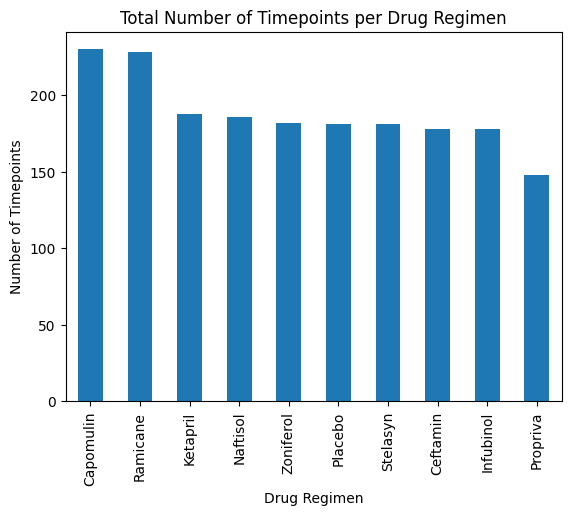

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = cleaned_data_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

# Create a bar plot
regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints per Drug Regimen')
plt.show()

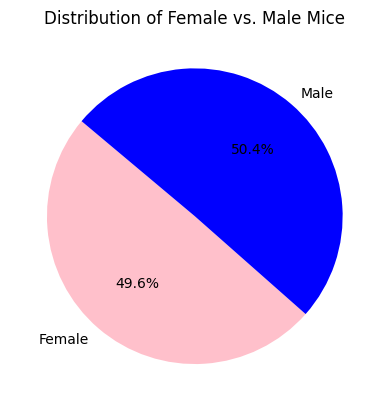

In [82]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_counts = cleaned_data_df[['Mouse ID', 'Sex']].drop_duplicates().groupby('Sex')['Mouse ID'].count()

# Create a pie chart using Pandas
mice_gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'blue'])
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')
plt.show()

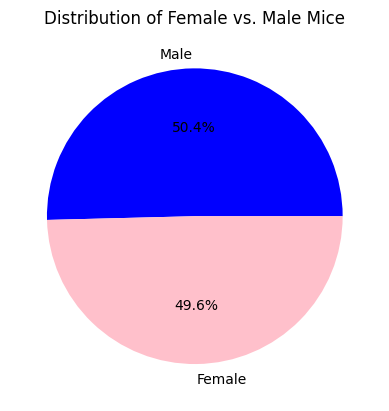

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of mice for each sex
male_count = unique_mice['Sex'].value_counts()['Male']
female_count = unique_mice['Sex'].value_counts()['Female']

# Create a pie chart using Matplotlib.pyplot
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data_df[cleaned_data_df["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, filtered_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [85]:
# Filter data for the four treatment regimens
filtered_data = cleaned_data_df[cleaned_data_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Sort the data by 'Mouse ID' and 'Timepoint' in descending order
sorted_data = filtered_data.sort_values(['Mouse ID', 'Tumor Volume (mm3)'], ascending=[True, False])

# Get the last timepoint for each mouse
last_timepoint_data = sorted_data.groupby('Mouse ID').first().reset_index()

# Merge the last timepoint data with the original DataFrame to get the final tumor volume
merged_data = pd.merge(filtered_data, last_timepoint_data, on=['Mouse ID', 'Tumor Volume (mm3)'])

# Extract the final tumor volume for each mouse
final_tumor_volume = merged_data[['Mouse ID', 'Tumor Volume (mm3)']]


# Print the final tumor volume data
final_tumor_volume

,Mouse ID,Tumor Volume (mm3)
0,k403,45.000000
1,s185,45.000000
2,x401,45.473753
3,m601,45.000000
4,g791,45.851531
...,...,...
95,x822,61.386660
96,y163,67.685569
97,y769,68.594745
98,y865,64.729837


In [86]:
# Initialize the list
final_tumor_volume = []

# Loop through treatments
for treatment in selected_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == treatment]
    
    # Check if treatment_data is not empty
    if not treatment_data.empty:
        # Add the tumor volume data to the list
        final_tumor_volume.append(treatment_data['Tumor Volume (mm3)'].values)

        # Calculate the quartiles
        quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        Q1 = quartiles[0.25]
        Q3 = quartiles[0.75]
        IQR = Q3 - Q1

        # Determine outliers using upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Print out the results
        print(f"{treatment} potential outliers:")
        print(treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                             (treatment_data['Tumor Volume (mm3)'] > upper_bound)])
 

Capomulin potential outliers:
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
18           25.472143                 1  
19           23.343598                 1  
Ramicane potential outliers:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
9           22.050126                 1  
Infubinol potential outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Ceftamin potential outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


C:\Users\krios\AppData\Local\Temp\ipykernel_8468\2487569544.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_tumor_volume, labels=selected_regimens)


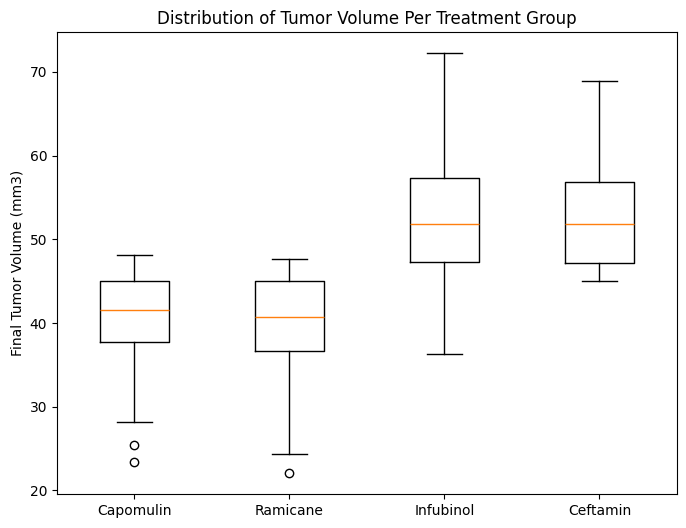

In [87]:
plt.figure(figsize=(8,6))
plt.boxplot(final_tumor_volume, labels=selected_regimens)

plt.title("Distribution of Tumor Volume Per Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(ticks=[1, 2, 3, 4], labels=selected_regimens)
plt.show()

#EXPECTED RESULTS FOR ABOVE DO NOT MATCH starter code results. I couln't resolve after walking my code for several days. 

## Line and Scatter Plots

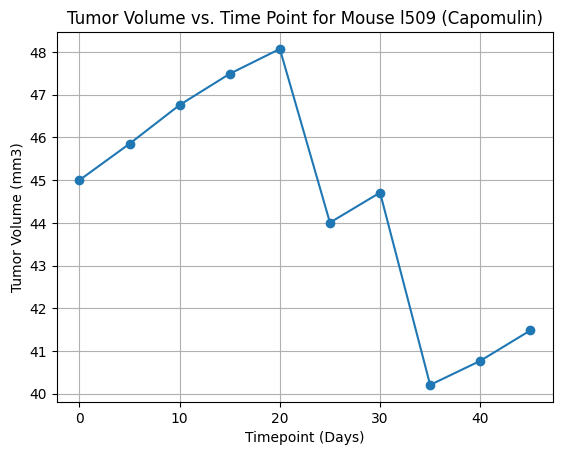

In [88]:
# Filter data for a specific mouse treated with Capomulin (replace 'l509' with your desired mouse ID)
mouse_id = 'l509'  # Replace with the desired mouse ID
mouse_data = cleaned_data_df[(cleaned_data_df['Drug Regimen'] == 'Capomulin') & (cleaned_data_df['Mouse ID'] == mouse_id)]

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.grid(True)
plt.show()

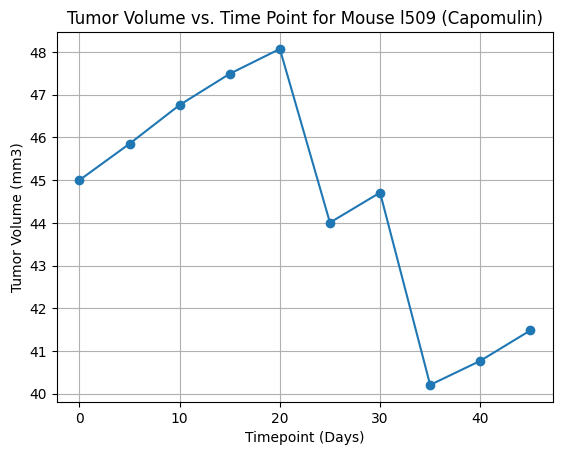

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for a specific mouse treated with Capomulin (replace 'l509' with your desired mouse ID)
mouse_id = 'l509'  # Replace with the desired mouse ID
mouse_data = cleaned_data_df[(cleaned_data_df['Drug Regimen'] == 'Capomulin') & (cleaned_data_df['Mouse ID'] == mouse_id)]

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.grid(True)
plt.show()

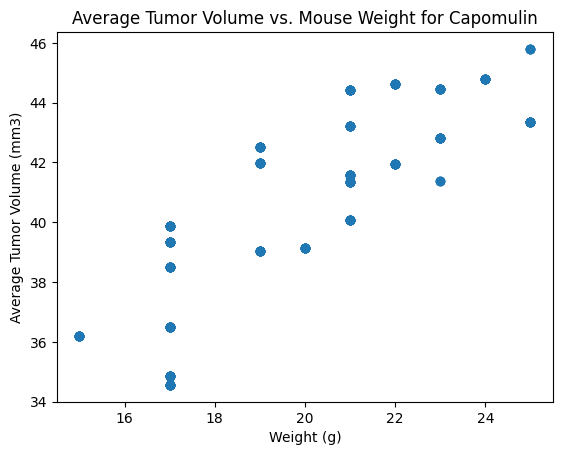

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter for Capomulin regimen
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID & calculate the avg. tumor volume per each mouse
avg_tumor_vol= capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the original data to get mouse weight
merged_data = pd.merge(capomulin_data, avg_tumor_vol, on='Mouse ID')

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8343958614425945
Slope: 0.9609669432428326
R-squared value: 0.6962164535925294


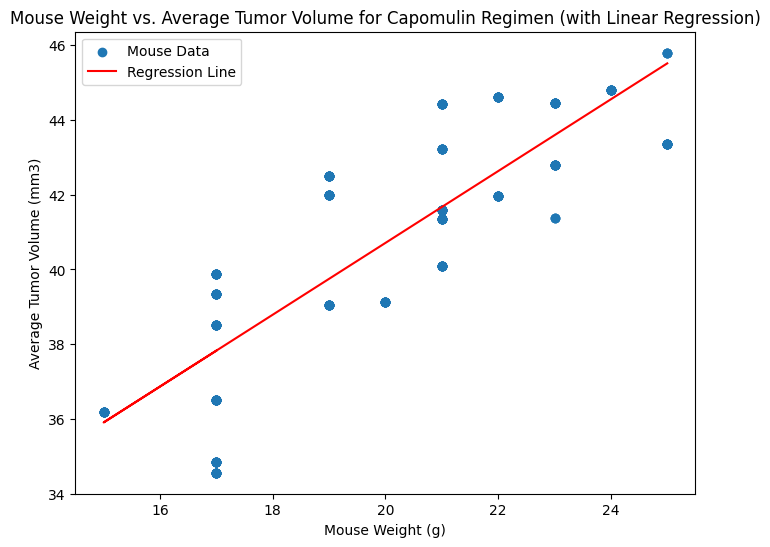

In [91]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Select the correct columns for mouse weight and tumor volume
mouse_weight = merged_data['Weight (g)']
average_tumor_volume = merged_data['Tumor Volume (mm3)_y']

# Calculate the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

print(f"Slope: {slope}")
print(f"R-squared value: {r_value**2}")

# Create the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, label="Mouse Data")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red", label="Regression Line")

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen (with Linear Regression)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()
